# **Поведение покупателей** (тема 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv('shopping_behavior.csv')

print("Первые 5 строк")
print(df.head(5))
print("----------------------------------------------")

print("Последние 5 строк")
print(df.tail(5))

print("----------------------------------------------")
df.info()

Первые 5 строк
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo C

In [ ]:
print("Пропущенные значения")
miss = df.isnull().sum()
print(miss)


print("----------------------------------------------")
print("Поиск дубликатов")
dublicate = df.duplicated().sum()
print(dublicate)

if dublicate > 0:
    df.drop_duplicates(inplace=True)

Пропущенные значения
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
----------------------------------------------
Поиск дубликатов
0


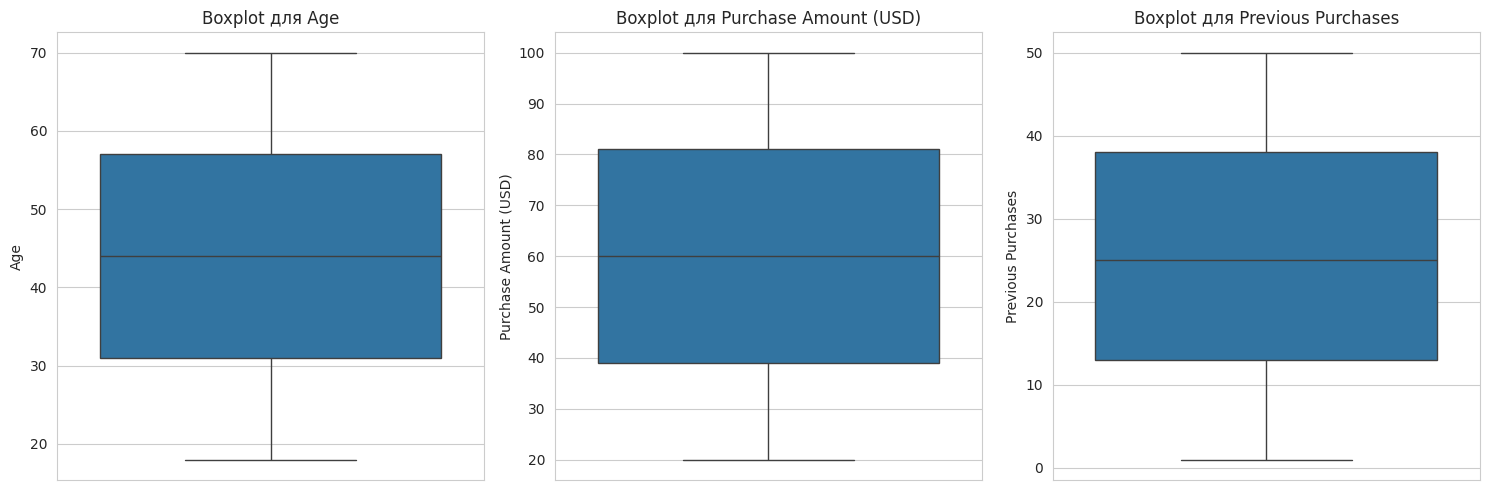

In [ ]:
plt.figure(figsize=(15, 5))

numerical_cols = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot для {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
print(df[numerical_cols].describe())

print("----------------------------------------------")
category_counts = df['Category'].value_counts()
print(category_counts)
print("----------------------------------------------")
print(f"Уникальные Location: {df['Location'].unique()[:10]}")
print("----------------------------------------------")
corr = df[numerical_cols].corr()
print(corr)

               Age  Purchase Amount (USD)  Previous Purchases
count  3900.000000            3900.000000         3900.000000
mean     44.068462              59.764359           25.351538
std      15.207589              23.685392           14.447125
min      18.000000              20.000000            1.000000
25%      31.000000              39.000000           13.000000
50%      44.000000              60.000000           25.000000
75%      57.000000              81.000000           38.000000
max      70.000000             100.000000           50.000000
----------------------------------------------
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
----------------------------------------------
Уникальные Location: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri']
----------------------------------------------
                            Age  Purchase Am

# Графики

/tmp/ipython-input-2008858268.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="magma")
/tmp/ipython-input-2008858268.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette="cubehelix")


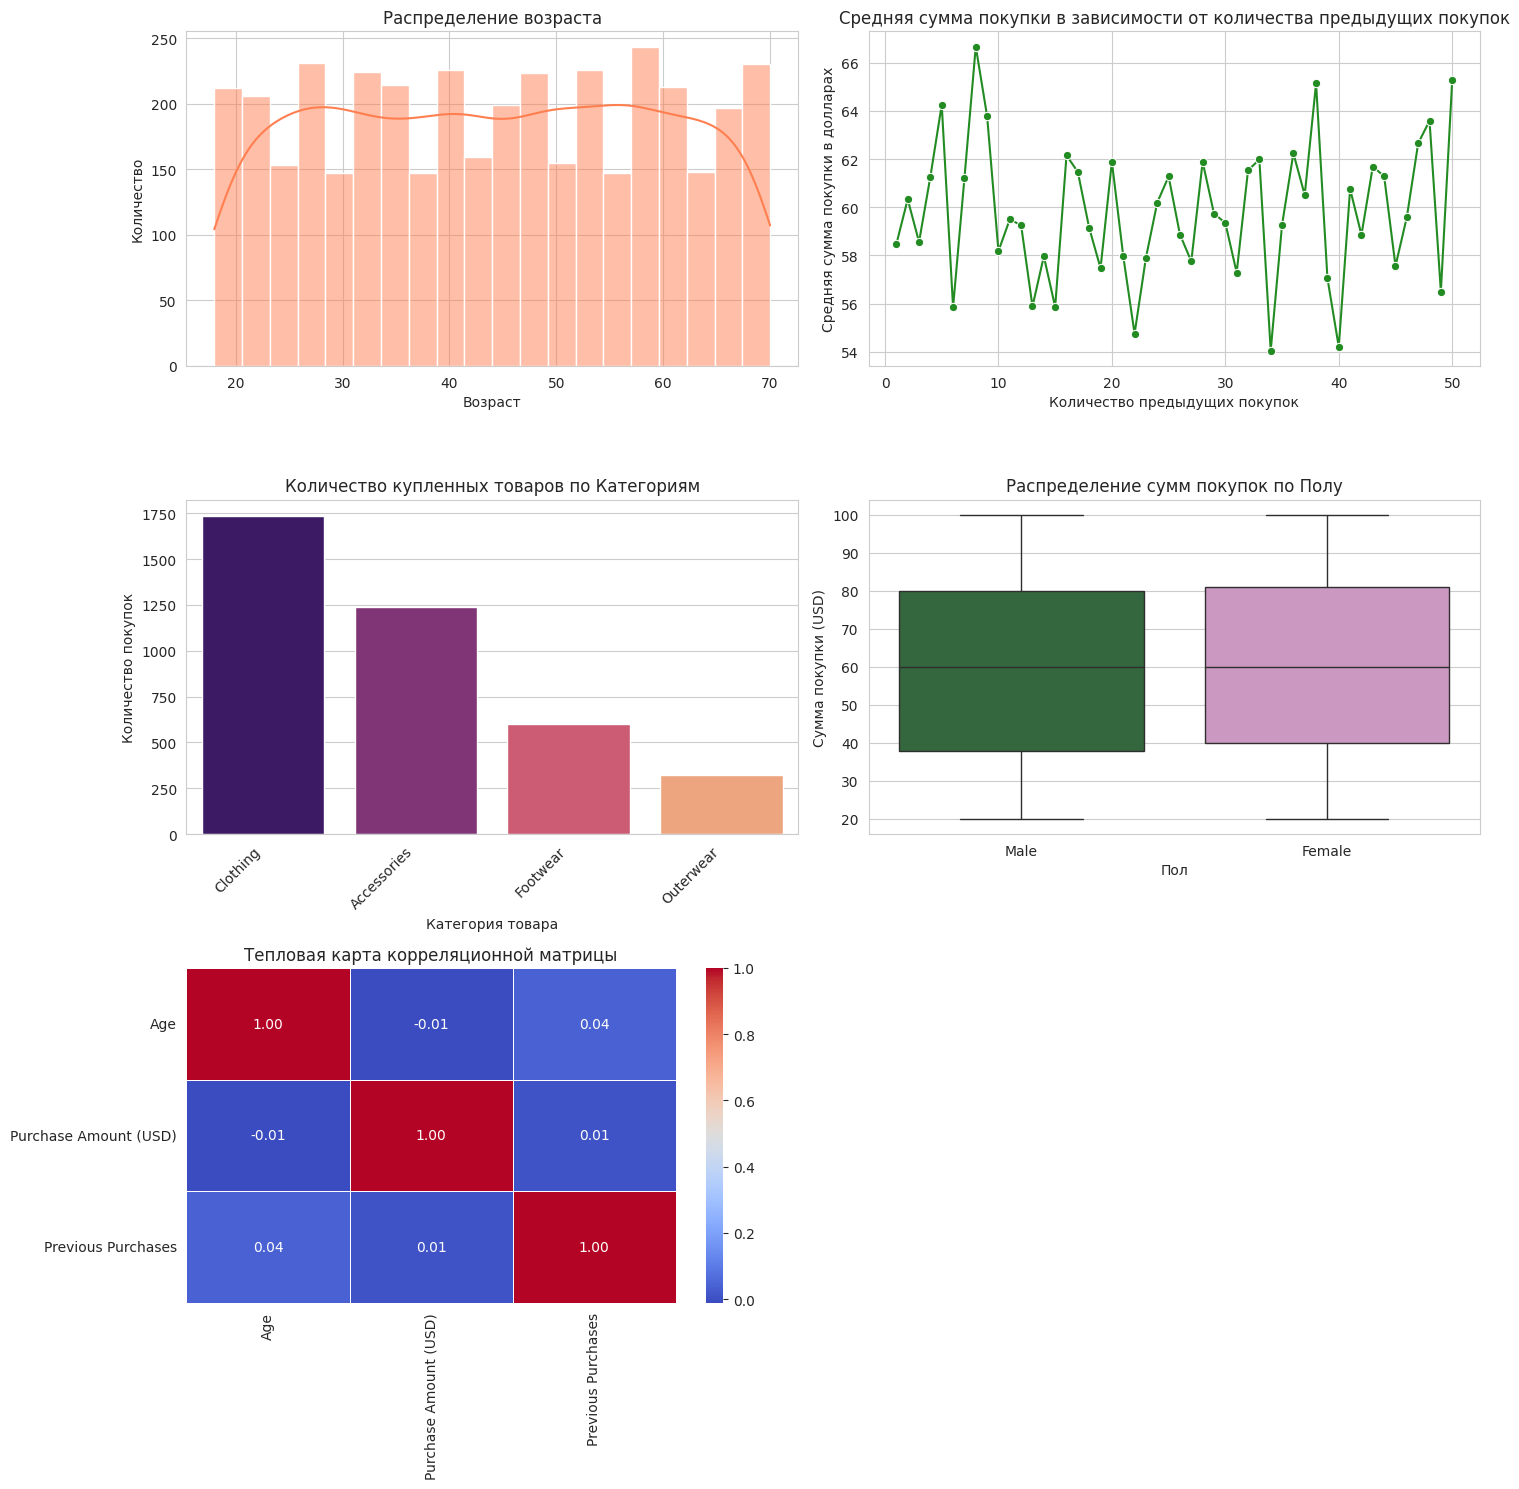

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='coral')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')

# -------------------------------
avgpurchase = df.groupby('Previous Purchases')['Purchase Amount (USD)'].mean().reset_index()
plt.subplot(3, 2, 2)
sns.lineplot(x='Previous Purchases', y='Purchase Amount (USD)', data=avgpurchase, marker='o', color='forestgreen')
plt.title('Средняя сумма покупки в зависимости от количества предыдущих покупок')
plt.xlabel('Количество предыдущих покупок')
plt.ylabel('Средняя сумма покупки в долларах')

# -------------------------------
plt.subplot(3, 2, 3)
sns.barplot(x=category_counts.index, y=category_counts.values, palette="magma")
plt.title('Количество купленных товаров по Категориям')
plt.xlabel('Категория товара')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45, ha='right')

# -------------------------------
plt.subplot(3, 2, 4)
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette="cubehelix")
plt.title('Распределение сумм покупок по Полу')
plt.xlabel('Пол')
plt.ylabel('Сумма покупки (USD)')

# -------------------------------
plt.subplot(3, 2, 5)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Тепловая карта корреляционной матрицы')

plt.tight_layout()
plt.show()

In [ ]:

avg_purch_gender = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].mean().reset_index()
print(avg_purch_gender.head(10))

payment_counts = df.groupby('Payment Method')['Customer ID'].count().sort_values(ascending=False).reset_index()
payment_counts.columns = ['Payment Method', 'Count']
print(payment_counts)

print("----------------------------------------------")
pivot_table_reviews = df.pivot_table(
    values='Review Rating',
    index='Category',
    columns='Season',
    aggfunc='mean'
)
print(pivot_table_reviews)

      Category  Gender  Purchase Amount (USD)
0  Accessories  Female              60.762755
1  Accessories    Male              59.411557
2     Clothing  Female              60.496403
3     Clothing    Male              59.803556
4     Footwear  Female              59.472362
5     Footwear    Male              60.645000
6    Outerwear  Female              58.425743
7    Outerwear    Male              56.605381
  Payment Method  Count
0         PayPal    677
1    Credit Card    671
2           Cash    670
3     Debit Card    636
4          Venmo    634
5  Bank Transfer    612
----------------------------------------------
Season           Fall    Spring    Summer    Winter
Category                                           
Accessories  3.743519  3.820598  3.768590  3.743894
Clothing     3.703747  3.763436  3.686765  3.733929
Footwear     3.837500  3.793865  3.727500  3.813571
Outerwear    3.640909  3.824691  3.754667  3.777500
